The Adult11 dataset is a popular dataset available in Seaborn, and it has been extensively used for educational and research purposes.

Rows - 48842
columns - 15

In [63]:
#  1. Load the Adult11 Dataset

import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# Load the Adult dataset

Adult_dataset = pd.read_csv('adult11.csv')



# Preview the first few rows

Adult_dataset.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [64]:
# 2. Check Data Summary and Missing Values

# Dataset overview

print("Shape of the dataset:", Adult_dataset.shape)

print("\nColumns in the dataset:\n", Adult_dataset.columns)



# Check for missing values

print("\nMissing values in each column:\n", Adult_dataset.isnull().sum())



# Data types and summary statistics

print("\nData types:\n", Adult_dataset.dtypes)

print("\nSummary Statistics:\n", Adult_dataset.describe(include='all'))


Shape of the dataset: (48842, 15)

Columns in the dataset:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

Missing values in each column:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Data types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64


As there are no missing values we can go further in the analysis

In [65]:
# Create a copy to avoid modifying the original DataFrame

Adult_dataset_filled = Adult_dataset.copy()


Salary:
 salary
<=50K    37155
>50K     11687
Name: count, dtype: int64


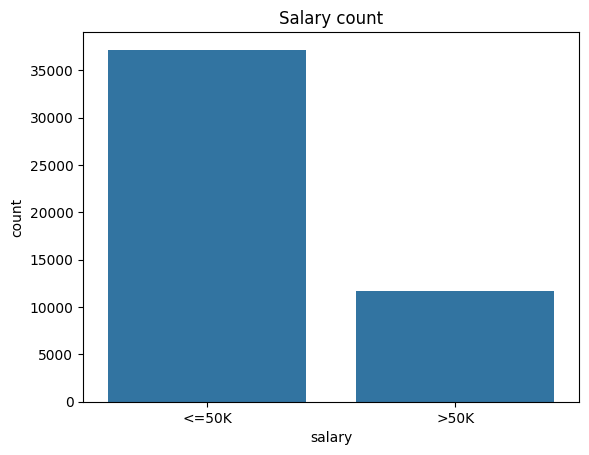


Race Distribution:
 race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


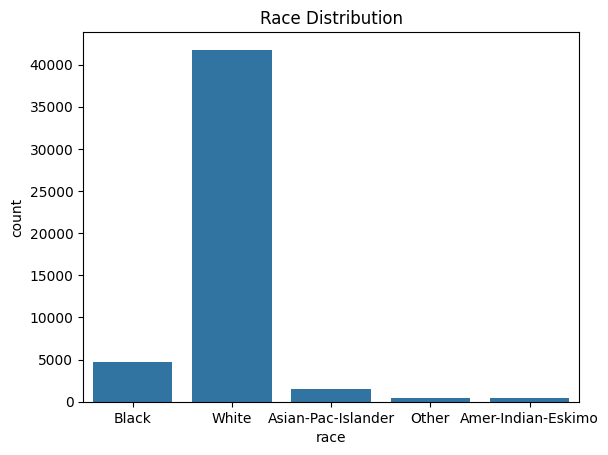


Age Statistics:
 count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


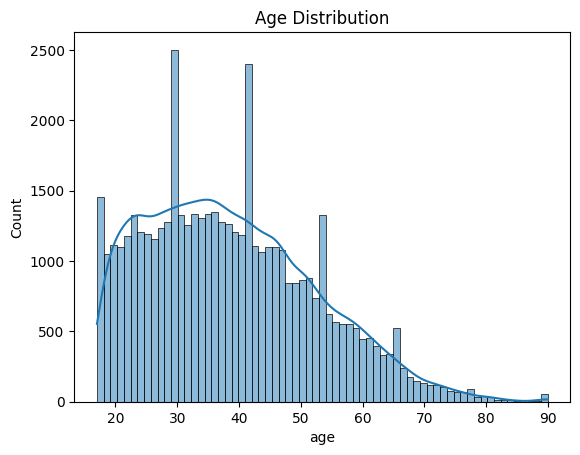


Sex Distribution:
 gender
Male      32650
Female    16192
Name: count, dtype: int64


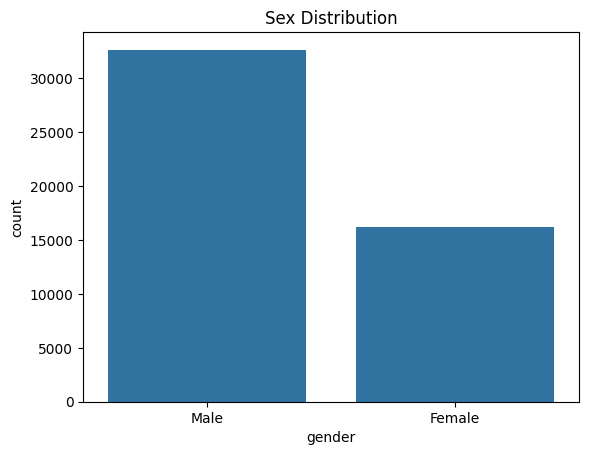

In [66]:
# 3. Univariate Analysis

#  Explore individual variables (salary, race , age, sex).



# Analyze 'salary'

print("\nSalary:\n", Adult_dataset_filled['salary'].value_counts())

sns.countplot(x='salary', data=Adult_dataset_filled)

plt.title('Salary count')

plt.show()


# Analyze 'Race'

print("\nRace Distribution:\n", Adult_dataset_filled['race'].value_counts())

sns.countplot(x='race', data=Adult_dataset_filled)

plt.title('Race Distribution')

plt.show()

# Analyze 'age'

print("\nAge Statistics:\n", Adult_dataset_filled['age'].describe())

sns.histplot(x='age', data=Adult_dataset_filled, kde=True)

plt.title('Age Distribution')

plt.show()

# Analyze 'sex'

print("\nSex Distribution:\n", Adult_dataset_filled['gender'].value_counts())

sns.countplot(x='gender', data=Adult_dataset_filled)

plt.title('Sex Distribution')

plt.show()


Salary by race :
 race                salary
Amer-Indian-Eskimo  <=50K       415
                    >50K         55
Asian-Pac-Islander  <=50K      1110
                    >50K        409
Black               <=50K      4119
                    >50K        566
Other               <=50K       356
                    >50K         50
White               <=50K     31155
                    >50K      10607
Name: count, dtype: int64


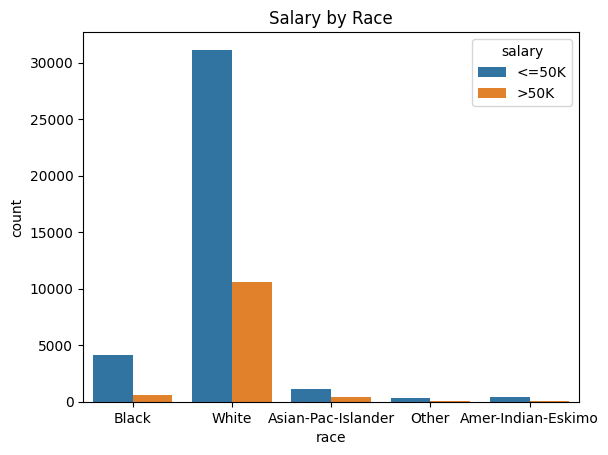


Salary by Gender Class:
 gender  salary
Female  <=50K     14423
        >50K       1769
Male    <=50K     22732
        >50K       9918
Name: count, dtype: int64


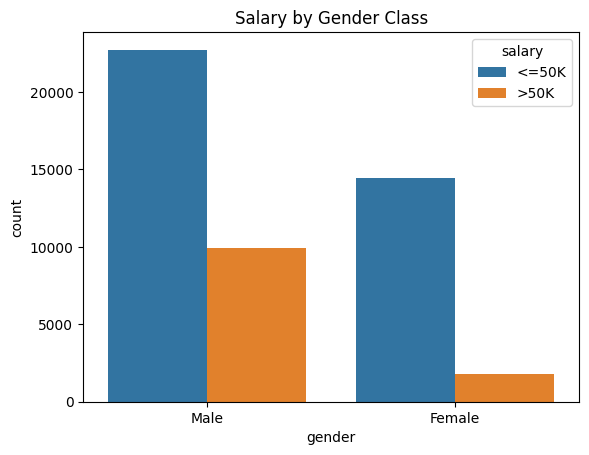


Salary by Age Group:
 age_group  salary
Child      <=50K      1457
           >50K          0
Adult      <=50K     34252
           >50K      11330
Senior     <=50K      1446
           >50K        357
Name: count, dtype: int64


C:\Users\vishn\AppData\Local\Temp\ipykernel_7688\534203234.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSalary by Age Group:\n", Adult_dataset_filled.groupby('age_group')['salary'].value_counts())


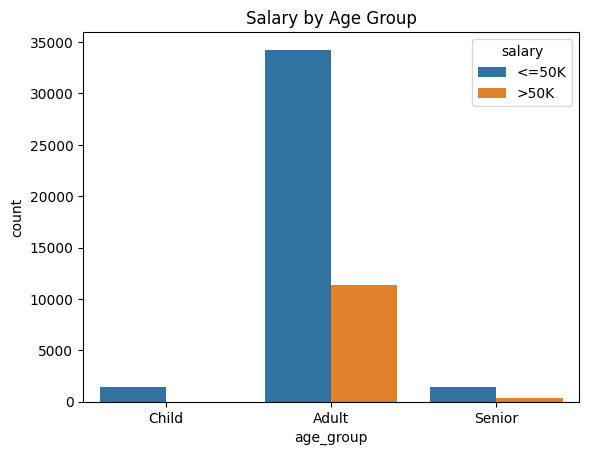

In [67]:
# 4. Bivariate Analysis

#Explore salary trends based on race, age, and gender.


# Analyze salary based on race

print("\nSalary by race :\n", Adult_dataset_filled.groupby('race')['salary'].value_counts())

sns.countplot(x='race', hue='salary', data=Adult_dataset_filled)

plt.title('Salary by Race')

plt.show()


# Analyze salary based on gender

print("\nSalary by Gender Class:\n", Adult_dataset_filled.groupby('gender')['salary'].value_counts())

sns.countplot(x='gender', hue='salary', data=Adult_dataset_filled)

plt.title('Salary by Gender Class')

plt.show()

# Analyze salary based on age groups (create age bins)

Adult_dataset_filled['age_group'] = pd.cut(Adult_dataset_filled['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSalary by Age Group:\n", Adult_dataset_filled.groupby('age_group')['salary'].value_counts())

sns.countplot(x='age_group', hue='salary', data=Adult_dataset_filled)

plt.title('Salary by Age Group')

plt.show()

5. Insights from Analysis

Findings

Race: White race has high employment rate with high salaries compared to other races.

Gender: Males earn higher salaries then females.

Age: Middle age group classfied as adults earns more than other age groups

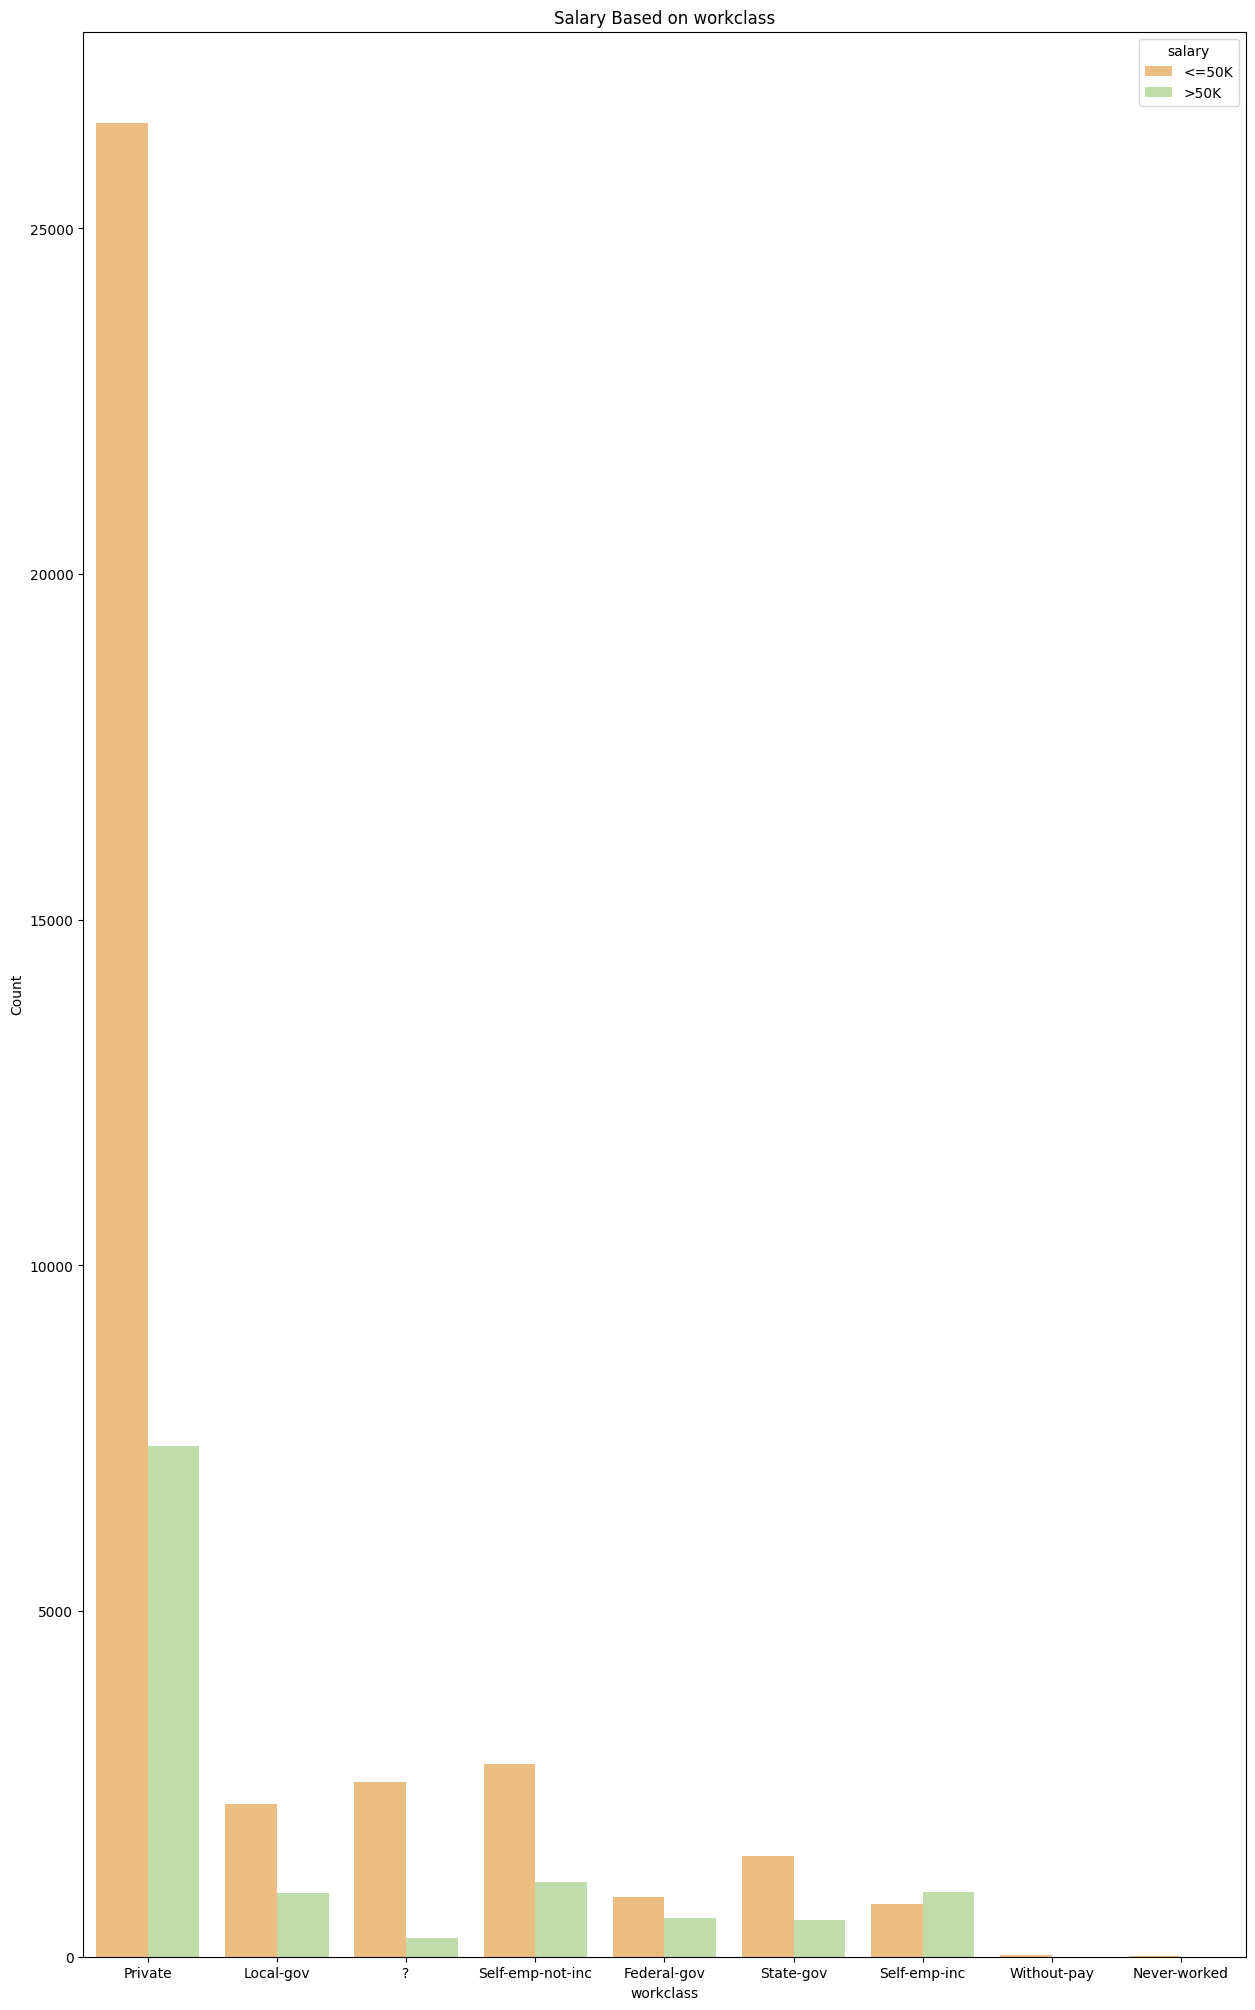

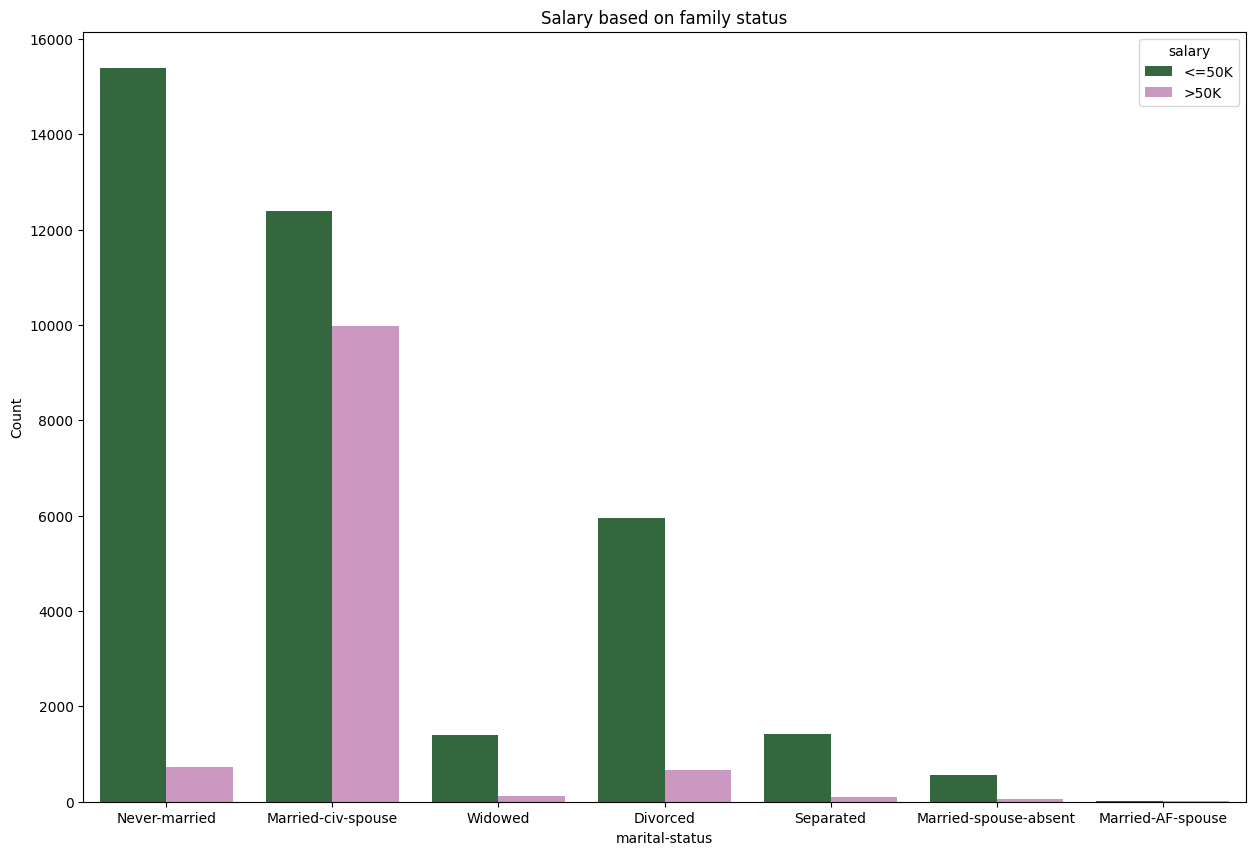

In [68]:
# 6. Salary Analysis

# We’ll analyze how salary depends on specific features, such as:

# Workclass.

# Maritial status.


# Salary Based on workclass

plt.figure(figsize=(15, 25))

sns.countplot(x='workclass', hue='salary', data=Adult_dataset, palette='Spectral' , )

plt.title('Salary Based on workclass')

plt.xlabel('workclass' )


plt.ylabel("Count")

plt.legend(title='salary')

plt.show()


# Maritial status Analysis


plt.figure(figsize=(15, 10))

sns.countplot(x='marital-status', hue='salary', data=Adult_dataset, palette='cubehelix')

plt.title('Salary based on family status')

plt.xlabel('marital-status')

plt.ylabel('Count')

plt.legend(title='salary')

plt.show()

7. Feature Engineering

Create meaningful features for better insights:

Age Group: Categorize people into age brackets.

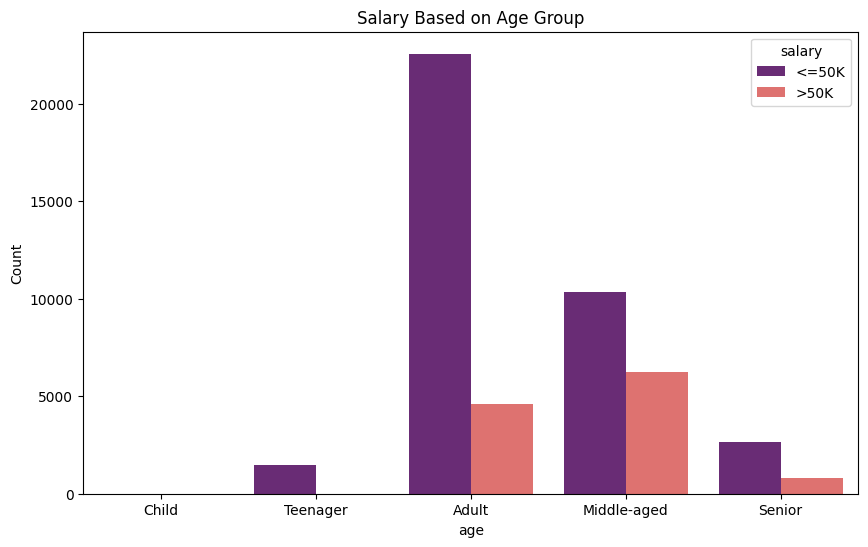

In [72]:
# Create Age Group

bins = [0, 12, 18, 40, 60, 80]

labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']


# Visualize Salary by Age Group

plt.figure(figsize=(10, 6))

sns.countplot(x='age', hue='salary', data=Adult_dataset_filled, palette='magma')

plt.title('Salary Based on Age Group')

plt.xlabel('age')

plt.ylabel('Count')

plt.legend(title='salary', )

plt.show()

Conclusion and Analysis of Adult Dataset EDA

After conducting a detailed exploratory data analysis (EDA) on the Adult dataset, here are the key findings and insights:

1. Demographic Insights

   -Gender: Males have higher salary then females

   -Age-groups : Adults(18<age>40) have higher employment whereas middle aged people (40<age>60) have higher salaries whereas employment         decreases as these aged people tend to retire


2. Socioeconomic Insights

   -Race : white people tend to have higher employment and salaries whereas other races have lower employment and salaries

   -Maritial status: Never married people have higher employment whereas the married civ couple have higher salaries because of the maturity of couples

3. Employment Insights

   -employer: Private job people have higher employment as well as higher salaries too

 


Recommendations for Future Analysis

Predictive Modeling:

Use machine learning algorithms (e.g., Logistic Regression, Random Forest) to predict salary using these insights.

Detailed Behavioral Studies:

Explore time-series or sequence-based data (if available) to understand the salary process better.

Feature Engineering:

Combine or create more features, such as interaction terms between race and sex or non-linear transformations .